# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Loading data

In [2]:
data = pd.read_csv('/Users/riyavasileva/Ironhack/data_mid_bootcamp_project_regression/regression_data_clean.csv')

# Exploratory Data Analysis (EDA)

In this section, we will conduct a basic exploration of the data and its features.

 * checking if the data heading are standardised
 * looking at the data
 * checking data shape
 * checking mean, std, max, min
 * checking for duplicates
 * checking for null values
 * checking data types

We will also visualise the data through histograms to check it out visually (e.g. skeweness) and correlations. These visualisations will help us decide which columns/variables to adjust/drop/further consider for our analysis.

In [3]:
#checking if any data heading standardisation is needed -> no, already standardised
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [4]:
#brief look at the data
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
data.shape 
#the dataset has 21597 data entries and 21 columns

(21597, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
#checking mean, std, max, min
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [8]:
#checking for duplicates-> #1 number of unique values
data.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [9]:
#checking for duplicates -> #2 I would like to further check IDs as there are 170 duplicates. 
data.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [10]:
#checking for duplicates -> #3 Do IDs duplicates have different values?
id_dup = data[data.duplicated(subset=['id'], keep=False)]
id_dup.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,7/25/14,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,12/23/14,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,6/18/14,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,9/5/14,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000


<b>Decision duplicates: </b> As we can see from the previous output, the entries for the identical IDs are different. Hence, we will keep duplicates in the dataset (for the time being). 
Assumption: might be the case that propeties are re-sold.

In [11]:
#checking for null values 
data.isnull().any()  

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [12]:
#triple checking again.. 
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,id,0.0
11,sqft_above,0.0
19,sqft_lot15,0.0
18,sqft_living15,0.0
17,long,0.0
16,lat,0.0
15,zipcode,0.0
14,yr_renovated,0.0
13,yr_built,0.0
12,sqft_basement,0.0


<b> Outcome rg Null Values </b>: No null values in the dataset, yeey!

In [13]:
#checking data types 
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

<b> First observations: </b>

* only one categorical variable- date. Should be adjusted to date format later on. 
* 'floors' is marked as float, as well as bathrooms-> to investigate this further. 
* 'date' column not very useful. Perhaps we can look at 'date' + 'year renovated'/'year built' to add a new column.
* for the time being, we will keep the variables as they are although it can be argued that grade/conditions are categorical (note: first round I changed their types and completely messed up everything ha..) 

In [14]:
#checking floors values
data.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [15]:
#checking bathroom values
data.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<b> Floors </b>: 
    Google says that "FSI, meaning Floor Space Index, also known as Floor Area Ratio (FAR), is the ratio of the total built-up area to the total area of the plot....Although the methods of computation of the FAR differ from one city to another, the value generally does not exceed 2.5." (source: https://housing.com/news/real-estate-basics-floor-area-ratio/)
    
    
<b> Bathrooms </b>:
"There's the 1.25 bath (a full bathroom, plus a second bathroom comprised of a toilet only), 1.5 bath (the second bathroom has only toilet and sink, a combo frequently referred to as a 'powder room'), 1.75 (shower stall but no tub in the second bathroom), and the traditional full 2.0 bath." (source: https://www.brickunderground.com/blog/2011/02/the_175_bath_apartment)

-> It turneed out both fields are ok, just US housing language. I might change the type of the category later on. 

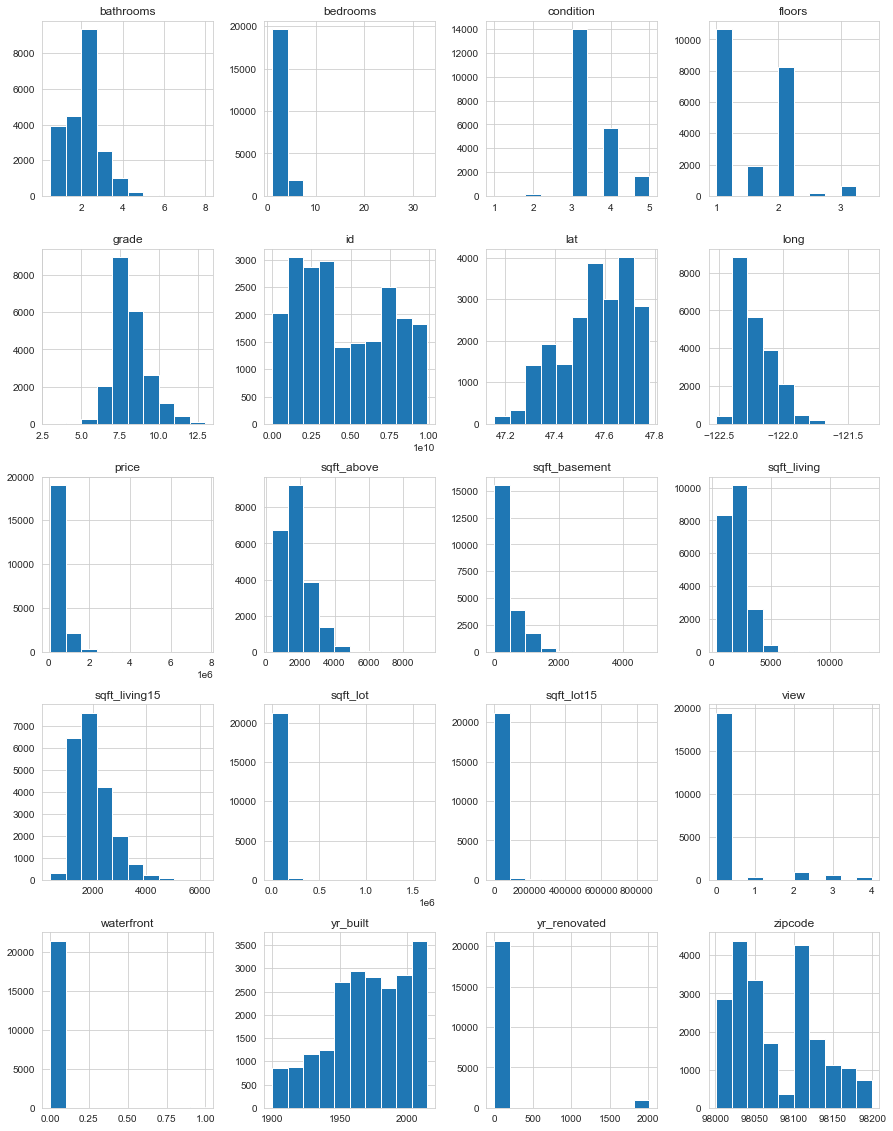

In [16]:
#checking the variables visually before making any further adjustments 
data.hist(figsize = (15,20));

<b> First observations: </b>
* id column not useful, to be dropped
* most of the data is right-skewed (needs to be adjusted once the variables for the regression model are chosen)

# (Basic) feature engineering

In this section, we will do basic adjustments to the original dataset. 
 * converting the data field 
 * transform date to only the year, and dropping the 'date' column
 * dropping columns: ID
 * adding a column: how old is the house?
 * resetting the index after all changes

In [17]:
#converting date field
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [18]:
#transfrom date to only the year, and drop the date
data['yr_sold']=pd.DatetimeIndex(data['date']).year
data=data.drop(['date'], axis=1)

In [19]:
#dropping ID- not useful for our analysis
data=data.drop(['id'], axis=1)
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'yr_sold'],
      dtype='object')

In [20]:
#function: how old is the house? (today=2016 as the data focuses on properties sold up to May 2015 )
data['property_age']= 2016 - data['yr_built']
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,61
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,65
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,83
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,51
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,29


In [22]:
#reset index
data = data.reset_index(drop = True)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age,renovation_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,61,59
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,65,63
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,83,82
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,51,49
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,29,28


# EDA: Correlations

Before making any further adjustments to the dataset, we will look at the correlations of the variables, and the highest correlated ones. 
This will help us choose where we should focus on for our model. 

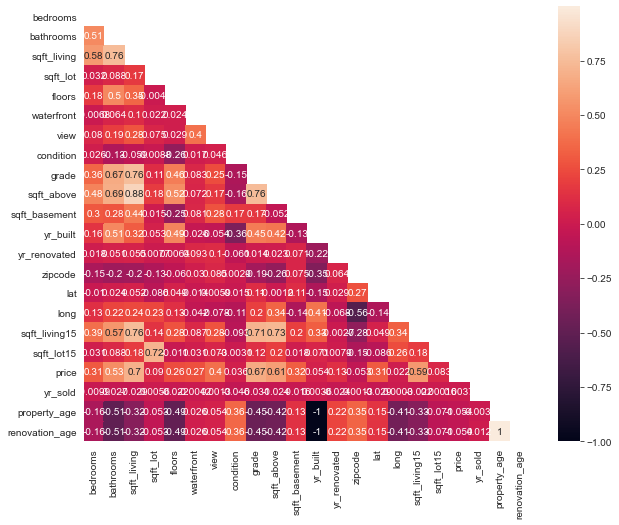

In [23]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [24]:
data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age,renovation_age
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787,-0.009949,-0.155670,-0.155817
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906,-0.026577,-0.507173,-0.507561
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917,-0.029014,-0.318152,-0.318592
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876,0.005628,-0.052946,-0.052853
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804,-0.022352,-0.489193,-0.489514
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398,-0.004168,0.026153,0.026085
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370,0.001268,0.053636,0.053653
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056,-0.045898,0.361592,0.360836
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951,-0.030635,-0.447865,-0.448322
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.605368,-0.023782,-0.424037,-0.424386


In [26]:
#looking at the correlation for the 10 highest variables
columns = correlations_matrix.nlargest(10, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

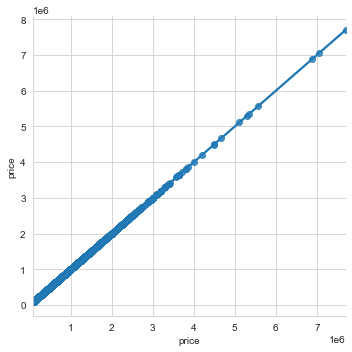

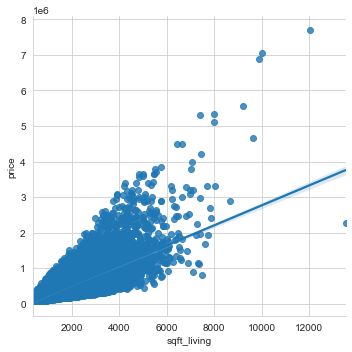

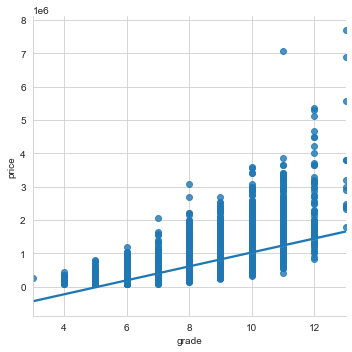

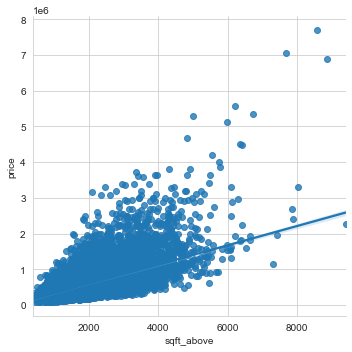

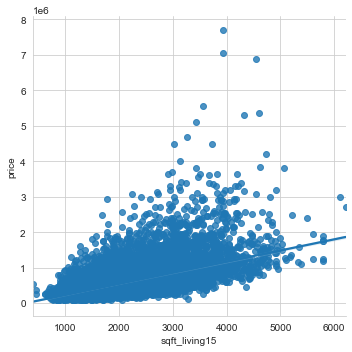

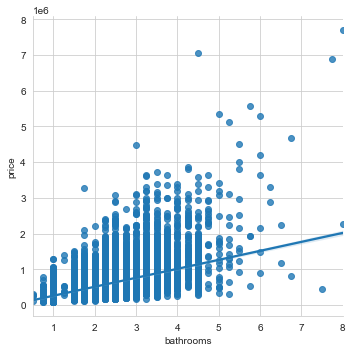

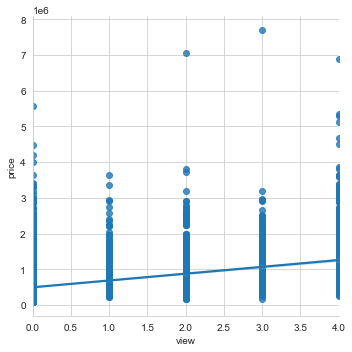

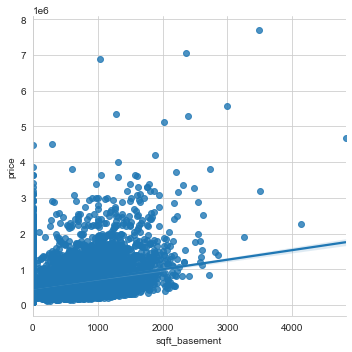

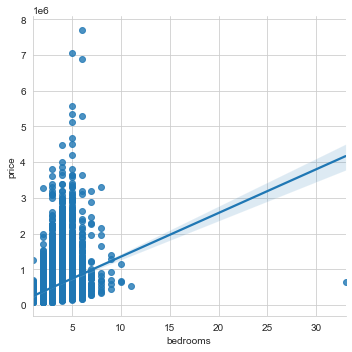

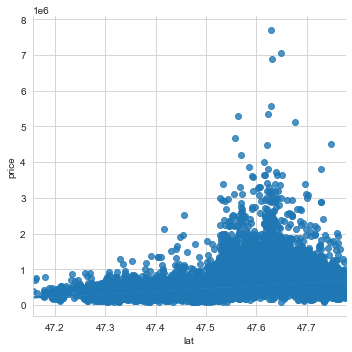

In [29]:
#I would like to see the correlations visually.
for col in columns:
    sns.lmplot(data=data, x=col, y= 'price')
    plt.show()

<b> Decision Multicollinearity </b>: As we can see from the dataset, sqft_living and sqft_above have the highest correlation of 0.88. Thus, we will remove one of the variables. 

<b> Decision Outliers </b>: bedrooms seems to have an outlier (33 rooms), but this time I have decided to keep all outliers into the dataset. 

<b> Side note </b>: Honestly, not sure how to use zipcode, lat and long..only useful for Tableau visualisations for now :D 

In [30]:
#dropping sqft_above due to the high correlation/risk of multicolinearity
data=data.drop(['sqft_above'], axis=1)

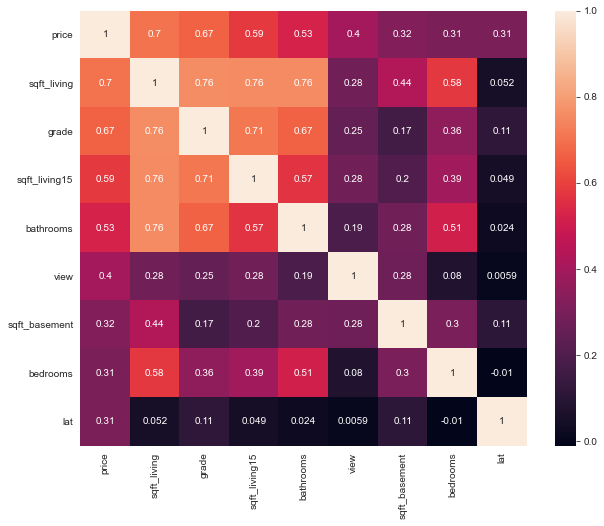

In [34]:
#looking at correlations again to choose variables
data_corr = data[['price', 'sqft_living', 'grade', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

<b>Decision Model Variables: </b>
* This is a tricky one. The most interesting variables that we can note are: sqft_living, grade, bathrooms. 

<b> Thus, we will conduct 2 regression analysis: </b>
* <b> Multilinear regression #1: </b> y=price and x= sqft_living, grade, bathrooms
* <b> Multilinear regression #2: </b> y= price and x=sqft_living, grade, bathrooms, waterfront, view (the logic behind the last two are purely thinking logically about what might impact the prices the most, and wanting to have 5 variables for comparison). TBD about property_age. 

edit: I have added property age as well to the second regression. 

Before we build the models, we will do some further cleaning on numerical and categorical variables. 

# EDA: Numerical Values

In this section, we will look at the numerical values. And check which ones need to be re-skewed. We will apply the technique only for the variables that will be later used in the model. 

Note: I will purposely change the skeweness on the original dataset, I'm only creating a new dataframe to visualise the numerical values. FINGERS CROSSED it's not a mistake.. 

In [36]:
#selecting only numerical values
numericals = data.select_dtypes(np.number)
numericals.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age,renovation_age
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,61,59
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,65,63
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,83,82
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,51,49
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,29,28


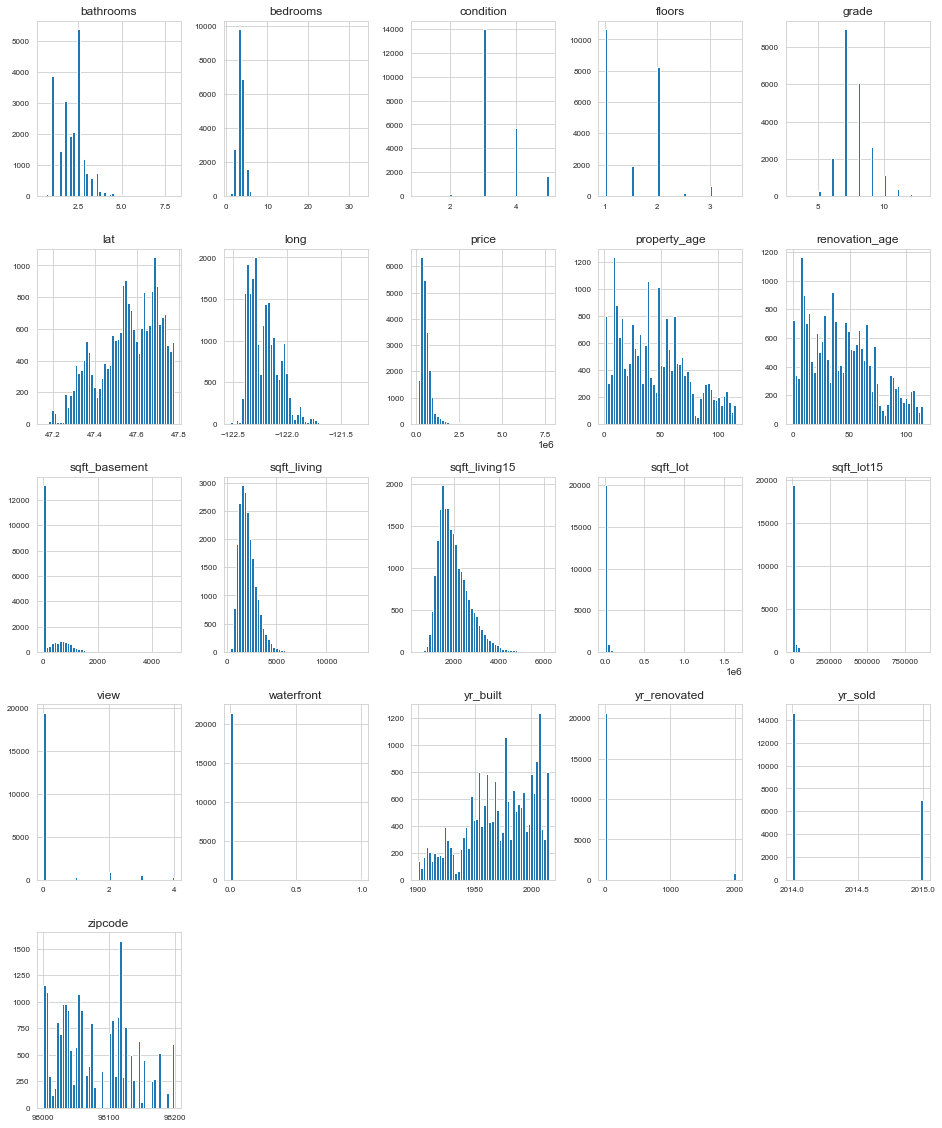

In [37]:
numericals.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

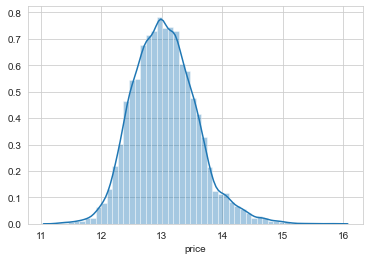

In [38]:
#reducing right-skeweness for price

data['price'] = np.log(data['price'])
sns.distplot(data['price']);

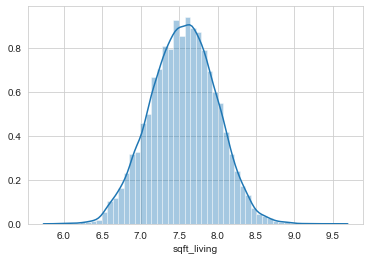

In [39]:
#reducing right-skeweness for sqft_living

data['sqft_living'] = np.log(data['sqft_living'])
sns.distplot(data['sqft_living']);

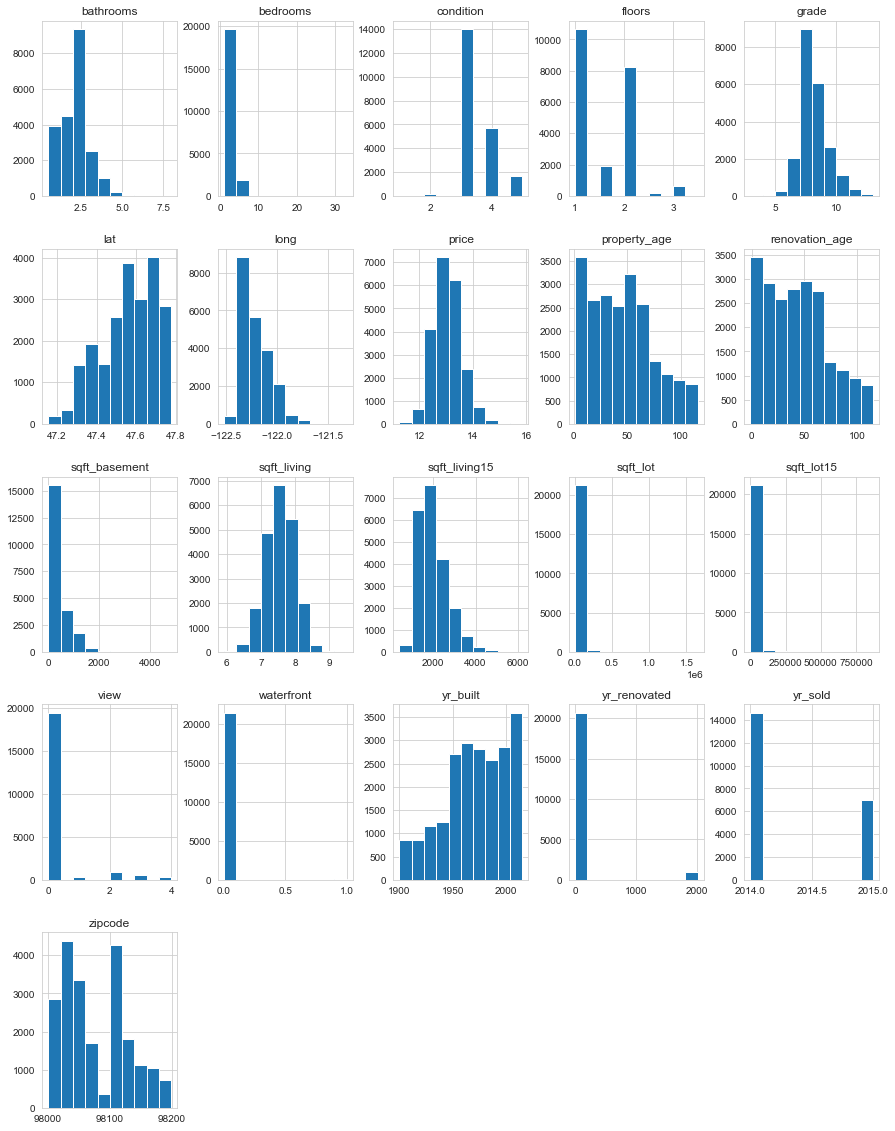

In [40]:
data.hist(figsize = (15,20));

<b>Outcome: </b> looks much better, you all! :) Also, sqft_living15 could have benefitted from the same procedure, but as we will not use it in the models- I have left it.. 

# EDA: Categorical Values

In this section, we will transform the following columns into separate categories:
* waterfront
* view
* sqft_basement (does the house have it?)
* yr_renovated (was the house renovated?)

You can use OneHotEncoder or dummies. I did some research and found a cool formula, so decided to give it a try. 

On top of this, we will bucket two items: property_age and bathrooms. 

In [41]:
#function: does the property have these features? 1-yes, 0, no
properties_features = lambda x: 1 if x > 0 else 0 
features = ["waterfront","view","sqft_basement","yr_renovated"]

for feat in features:
    data["yes_"+feat] = data[feat].transform(properties_features)

data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age,renovation_age,yes_waterfront,yes_view,yes_sqft_basement,yes_yr_renovated
0,3,1.00,7.073270,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,2014,61,59,0,0,0,0
1,3,2.25,7.851661,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,2014,65,63,0,0,1,1
2,2,1.00,6.646391,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,2015,83,82,0,0,0,0
3,4,3.00,7.580700,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,2014,51,49,0,0,1,0
4,3,2.00,7.426549,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,2015,29,28,0,0,0,0


In [42]:
#dropping watefront as we have yes_waterfront
data=data.drop(['waterfront'], axis=1)

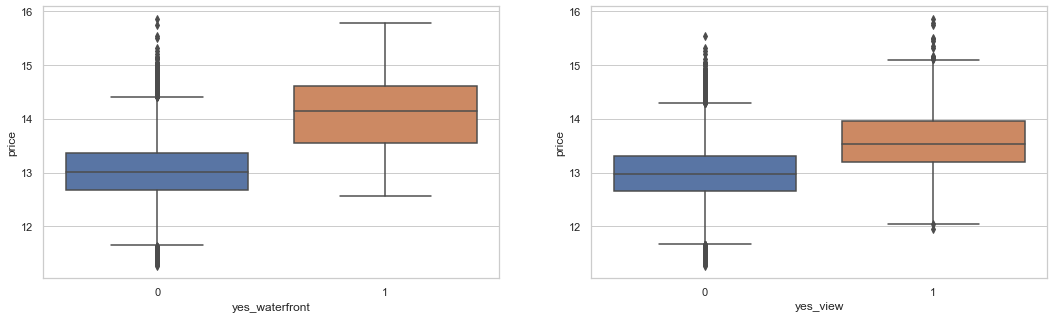

In [43]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(18,5))

sns.boxplot(x=data['yes_waterfront'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['yes_view'],y=data['price'], ax=axes[1])

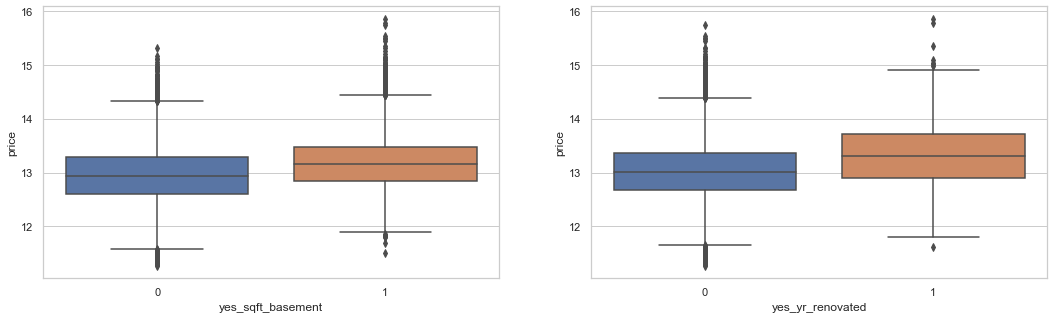

In [45]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(18,5))

sns.boxplot(x=data['yes_sqft_basement'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['yes_yr_renovated'],y=data['price'], ax=axes[1])

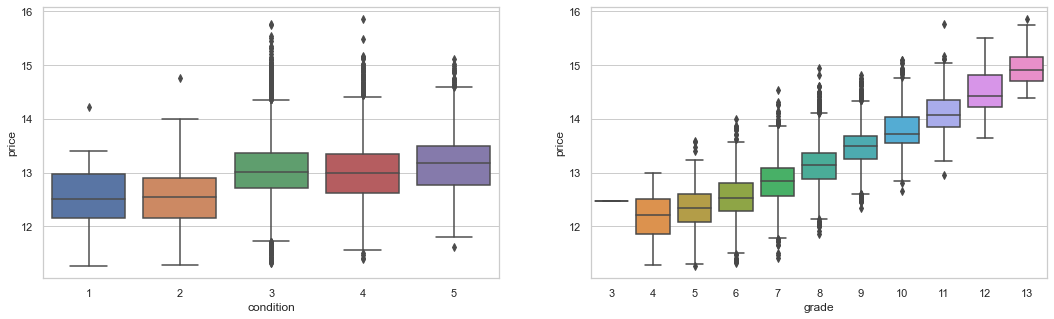

In [44]:
#out of curiousity I would like to see grade and condition treated as categoricals

sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(18,5))

sns.boxplot(x=data['condition'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['grade'],y=data['price'], ax=axes[1])

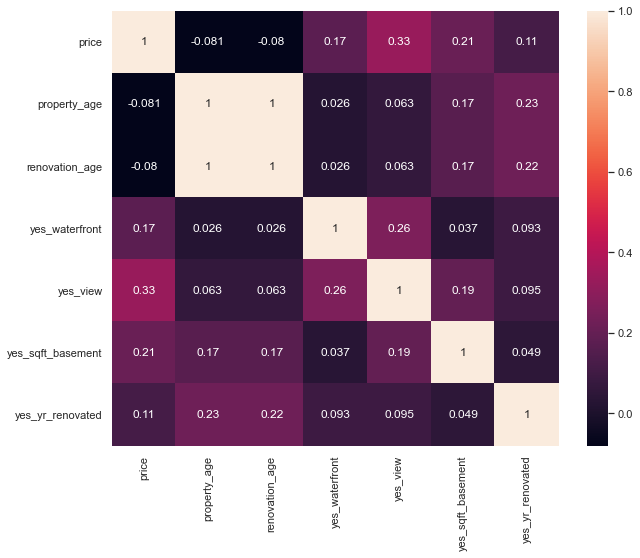

In [47]:
#I want to check the correlation. Is it worth using some of these variables?
data_corr1 = data[['price','property_age', 'renovation_age', 'yes_waterfront', 'yes_view', 'yes_sqft_basement', 'yes_yr_renovated']]
corr_matrix=data_corr1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

<b>Outcome:</b> they don't seem very useful. Nevertheless, we will still perform the #2 regression including views and waterfronts. 

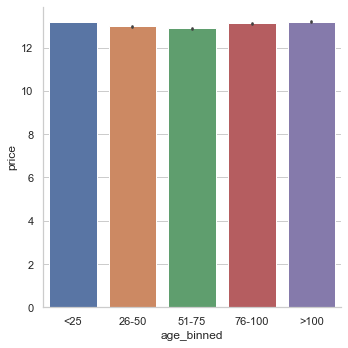

In [48]:
#binning age (I don't want to impact the original column in case if I messed up)
bins= [0,25,50,75,100,125]
labels = ['<25', '26-50', '51-75','76-100','>100']
data['age_binned'] = pd.cut(data['property_age'],bins= bins, labels=labels)

#and checking it visually..
sns.catplot(x="age_binned", y="price", kind="bar", data=data)

In [57]:
#creating a copy in case I messed up :D
data['bathrooms_copy']= data['bathrooms']

In [59]:
#bucketing bathrooms

bathroom_labels = ['0-2', '3-5', '6-8']
def bathrooms_new(x):
    if x < 3:
        return '0-2'
    elif x > 5:
        return '6-8'
    else:
        return '3-5'

data["bathrooms_copy"] = list(map(bathrooms_new, data["bathrooms_copy"]))
data['bathrooms_copy'].value_counts() 

0-2    18967
3-5     2587
6-8       43
Name: bathrooms_copy, dtype: int64

In [61]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_sold,property_age,renovation_age,yes_waterfront,yes_view,yes_sqft_basement,yes_yr_renovated,age_binned,bathrooms_copy
0,3,1.00,7.073270,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,2014,61,59,0,0,0,0,51-75,0-2
1,3,2.25,7.851661,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,2014,65,63,0,0,1,1,51-75,0-2
2,2,1.00,6.646391,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,2015,83,82,0,0,0,0,76-100,0-2
3,4,3.00,7.580700,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,2014,51,49,0,0,1,0,51-75,3-5
4,3,2.00,7.426549,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,2015,29,28,0,0,0,0,26-50,0-2


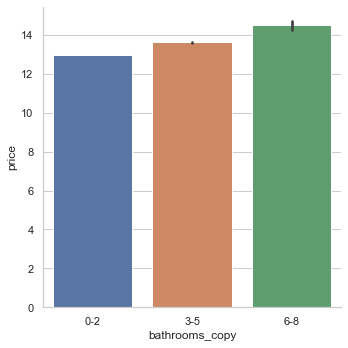

In [62]:
sns.catplot(x="bathrooms_copy", y="price", kind="bar", data=data)

Outcome: to keep things simple, I will use the original 'bathrooms' column for the models. (honestly, not sure if I did it correctly.. )

# Regression Model #1

In this trial, we will compare only three variables: sqft_living, grade and bathrooms. 

In [71]:
regression1=data[['sqft_living', 'grade', 'bathrooms']]
Y1=data['price']
X1=regression1

In [72]:
#splitting training data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [75]:
X1_train

,sqft_living,grade,bathrooms
753,7.774856,8,2.50
1418,8.067776,10,3.75
8178,7.455877,8,2.50
2254,7.533694,7,2.00
4063,7.955074,7,3.00
...,...,...,...
11964,7.709757,7,2.50
21575,7.926603,8,2.75
5390,7.333023,6,1.50
860,5.940171,5,0.75


In [77]:
X1_test

,sqft_living,grade,bathrooms
3686,6.745236,6,0.75
10247,7.319865,6,1.00
4037,7.489971,7,2.25
3437,7.038784,7,1.50
19291,7.313220,7,1.00
...,...,...,...
9400,7.882315,9,3.50
9092,7.889834,8,2.75
6650,7.377759,7,1.75
21095,7.922986,8,3.50


In [78]:
Y1_train

753      13.458550
1418     14.346139
8178     12.460715
2254     12.409013
4063     12.829334
           ...    
11964    12.994530
21575    13.256894
5390     12.610871
860      12.409013
15795    13.208541
Name: price, Length: 15117, dtype: float64

In [80]:
Y1_test

3686     11.794338
10247    12.936034
4037     13.110291
3437     12.779873
19291    13.314635
           ...    
9400     13.825461
9092     13.422468
6650     13.000196
21095    12.959727
3372     12.782686
Name: price, Length: 6480, dtype: float64

In [82]:
#regression model 
linreg1 = LinReg()    
linreg1.fit(X1_train, Y1_train)   
Y1_pred_linreg = linreg1.predict(X1_test)
Y1_pred_linreg

array([12.3735703 , 12.61686946, 12.88576648, ..., 12.84197552,
       13.26692291, 12.66616913])

In [83]:
#knn model
from sklearn.neighbors import KNeighborsRegressor

knn_model1 = KNeighborsRegressor(n_neighbors=4)
knn_model1.fit(X1_train, Y1_train)

KNeighborsRegressor(n_neighbors=4)

In [84]:
knn_predictions1 = knn_model1.predict(X1_test)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE1 = mean_absolute_error(Y1_test,knn_predictions1)
MSE1 = mean_squared_error(Y1_test,knn_predictions1)
RMSE1 = np.sqrt(MSE1)
R2_1 = r2_score(Y1_test,knn_predictions1)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE1))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE1))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE1))
print("The R2 of the model in the test set is: %4.2f" % (R2_1))

The mean absolute error of the model in the test set is:   0.31
The mean squared error of the model in the test set is:   0.15
The root mean squared error of the model in the test set is:   0.39
The R2 of the model in the test set is: 0.46


In [118]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     8688.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:01:03   Log-Likelihood:                -8243.3
No. Observations:               21597   AIC:                         1.649e+04
Df Residuals:                   21593   BIC:                         1.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2177      0.061    134.979      

In [123]:
#checking VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns

In [124]:
vif1.round(1)

,VIF Factor,features
0,637.1,const
1,3.1,sqft_living
2,2.4,grade
3,2.5,bathrooms


VIF is not between 5 and 10-> seems ok! :)

# Regression Model #2

In this trial, we will compare six variables: sqft_living, bathrooms, grade, waterfront, view and property age.

In [106]:
regression2=data[['sqft_living', 'grade', 'bathrooms','yes_waterfront','yes_view','property_age']]
Y2=data['price']
X2=regression2

In [107]:
#splitting training data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [108]:
#regression model 
linreg2 = LinReg()    
linreg1.fit(X2_train, Y2_train)   
Y2_pred_linreg = linreg1.predict(X2_test)
Y2_pred_linreg

array([12.39384241, 12.62317407, 12.79869301, ..., 12.74800907,
       13.12908259, 12.62256698])

In [109]:
#knn model
knn_model2 = KNeighborsRegressor(n_neighbors=4)
knn_model2.fit(X2_train, Y2_train)

KNeighborsRegressor(n_neighbors=4)

In [110]:
knn_predictions2 = knn_model2.predict(X2_test)

In [111]:
MAE2 = mean_absolute_error(Y2_test,knn_predictions2)
MSE2 = mean_squared_error(Y2_test,knn_predictions2)
RMSE2 = np.sqrt(MSE2)
R2_2 = r2_score(Y2_test,knn_predictions2)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE2))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE2))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE2))
print("The R2 of the model in the test set is: %4.2f" % (R2_2))

The mean absolute error of the model in the test set is:   0.27
The mean squared error of the model in the test set is:   0.12
The root mean squared error of the model in the test set is:   0.34
The R2 of the model in the test set is: 0.57


In [117]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     6397.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:00:27   Log-Likelihood:                -5759.5
No. Observations:               21597   AIC:                         1.153e+04
Df Residuals:                   21590   BIC:                         1.159e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3547      0.055    152.

In [120]:
#checking VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns

In [122]:
vif.round(1)

,VIF Factor,features
0,651.2,const
1,3.2,sqft_living
2,2.5,grade
3,2.9,bathrooms
4,1.1,yes_waterfront
5,1.2,yes_view
6,1.5,property_age


VIF is not between 5 and 10-> seems ok! :)